<a href="https://colab.research.google.com/github/M-PRERNA/MACHINE-LEARNING/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The image data set **FasionMnist** consists of 70,000 images which are 28x28 pixels each. 
we would be using 60,000 images for training and 10,000 for testing our model.
steps:

1. **flattening of images**- converting 2D images to 1D vector of 784(28x28) units(neurons) `tf.keras.layers.flatten(28,28,1)`
2. **Dense Layer**- this layer consists of 128 neurons and makes use of the **relu** activation function which gives it more power. `tf.keras.layers.Dense(128, activation=tf.nn.relu)`
3. **Output** - 10 neurons because each image is from the range of 10 categories like shoes, shirts, boots...
these output values resemble probabilities and each of those probabs' add up to one.
thus we make use of the SoftMax statement which would create the probabilities for us.

`tf.keras.layers.Dense(10, activation=tf.nn.softmax)`



# **ReLU** - Rectified linear unit
ReLU stands for Rectified Linear Unit and it is a mathematical function that looks like this:
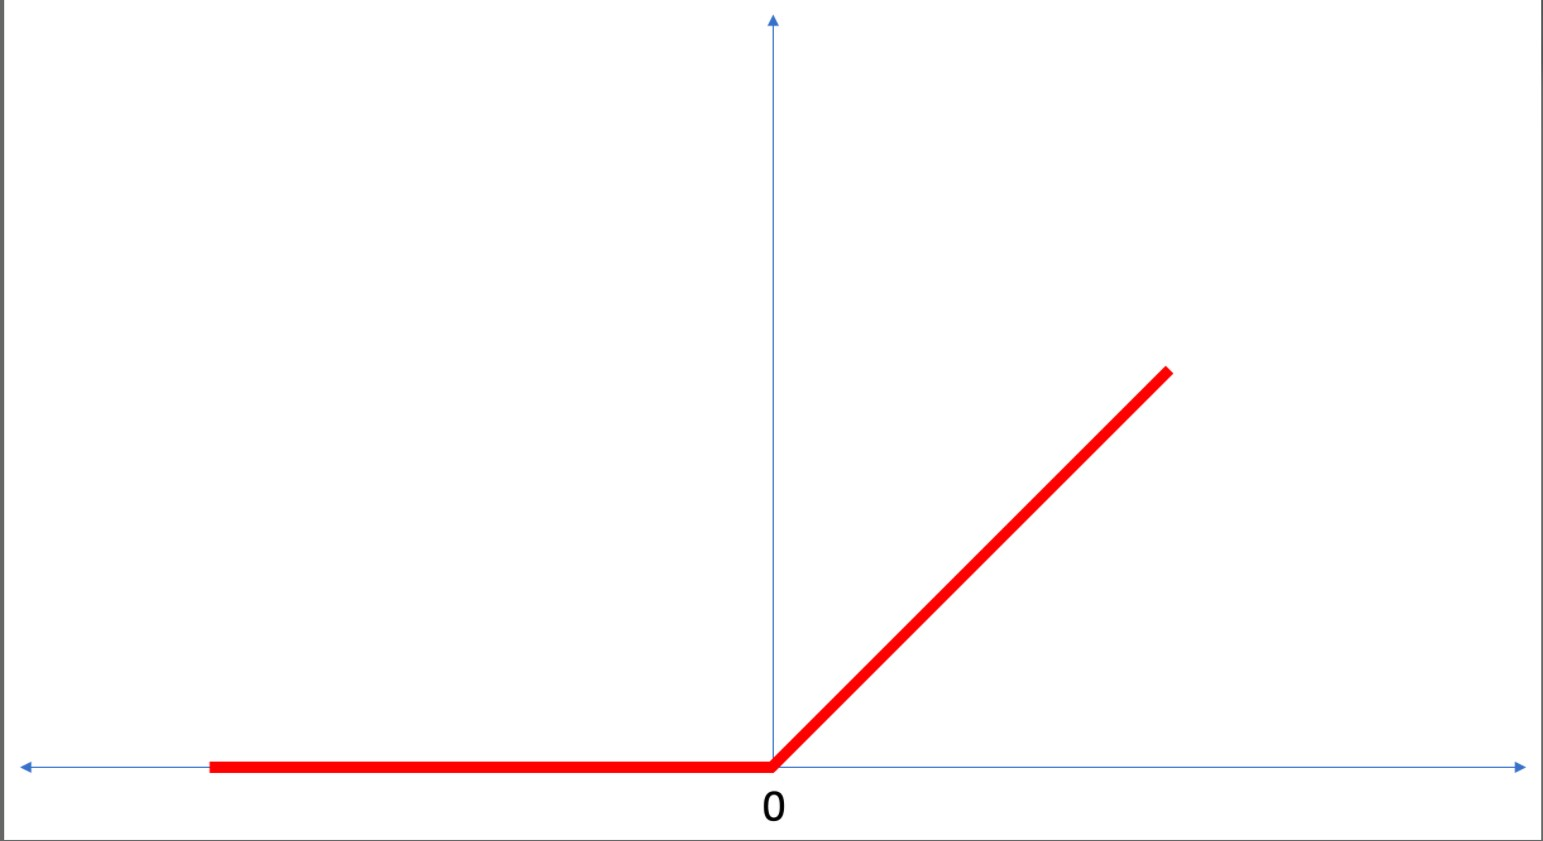

As we can see, the ReLU function gives an output of 0 if the input is negative or zero, and if input is positive, then the output will be equal to the input.

ReLU gives the network the ability to solve nonlinear problems.

Converting Celsius to Fahrenheit is a linear problem because `f = 1.8*c + 32` is the same form as the equation for a line, `y = m*x + b`. But most problems we want to solve are nonlinear. In these cases, adding ReLU to our Dense layers can help solve the problem.

ReLU is a type of activation function. There several of these functions (ReLU, Sigmoid, tanh, ELU), but ReLU is used most commonly and serves as a good default. To build and use models that include ReLU, you don’t have to understand its internals

# **classifying images of clothing**

# installing and importing dependencies

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 7.8MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
import tensorflow as tf
# importing tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging

In [3]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# importing the fashion mnist data set

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [4]:
# we're acessing datasets directly from the tensorflow using dataset API
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True , with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = metadata.features['label'].names
print(f"class names : {class_names}")

class names : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Exploring the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, and 10000 images in the test set:

In [6]:
number_of_train_examples = metadata.splits['train'].num_examples
number_of_test_examples = metadata.splits['test'].num_examples

print('Number of train examples: {}, Number of train examples: {} '.format(number_of_train_examples,number_of_test_examples))

Number of train examples: 60000, Number of train examples: 10000 


# preprocessing the data

The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [7]:
def normalize (image, labels):
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, labels

# map function applies the normalize function to both the train and test data sets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk. Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

# Exploring the processed data

exploring an image to see what it looks like

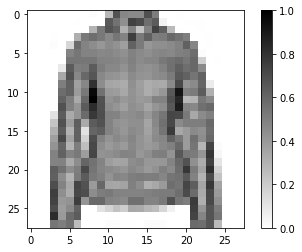

In [8]:
# take a single image and remove the color dimension by reshaping
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# plot the image
plt.figure()
plt.imshow(image , cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

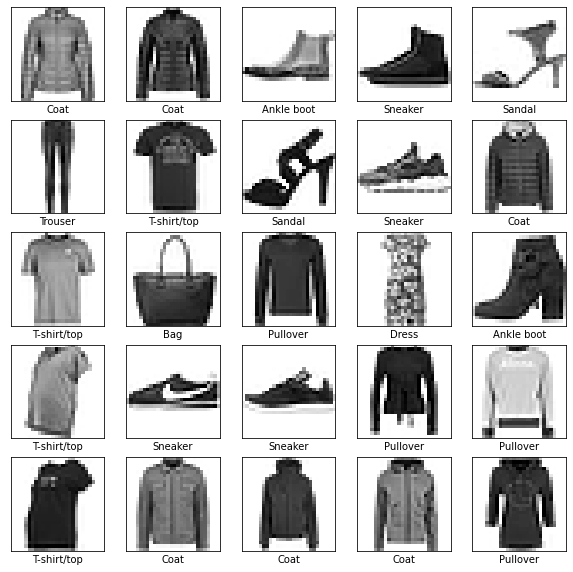

In [9]:

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

# Building the model

building the model requires configuring the layers and then compiling the model.

## Setup the layer 
The basic building block of a neural network is the layer. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have internal parameters which are adjusted (**"learned"**) during training.

In [11]:
model =tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28,1)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

This network has three layers:

* **input** `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

* **"hidden"** `tf.keras.layers.Dense`— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

* **output**  `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

> Note: Using `softmax` activation and `SparseCategoricalCrossentropy()` has issues and which are patched by the `tf.keras` model. A safer approach, in general, is to use a linear output (no activation function) with `SparseCategoricalCrossentropy(from_logits=True)`.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [12]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

## Training the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.



In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(number_of_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

In [15]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(number_of_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.6296 - accuracy: 0.7823
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3893 - accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3461 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3204 - accuracy: 0.8829
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8928


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

  # evaluation of the model
  evaluating the accuracy of the trained model on our test dataset

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(number_of_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3476 - accuracy: 0.8749
Accuracy on test dataset: 0.8748999834060669


* As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. This is completely normal, since the model was trained on the train_dataset. When the model sees images it has never seen during training, (that is, from the test_dataset), we can expect performance to go down.

# YAY! Making predictions from the model 

In [18]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [19]:
predictions.shape
#here the model has predicted the labels for each test images

(32, 10)

In [20]:
predictions[0] # lets look at our first prediction

array([3.0142157e-06, 1.1944608e-06, 8.7831784e-03, 1.4881780e-05,
       9.7426051e-01, 3.7748922e-11, 1.6753329e-02, 1.1704860e-09,
       1.8386477e-04, 6.4170291e-09], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

4

So the model is most confident that this image is a shirt, or class_names[4]. And we can check the test label to see this is correct:

In [22]:
test_labels[0]

4

# Extras

In [27]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [28]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [29]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [30]:
# predicting the image
predictions_single = model.predict(img)

print(predictions_single)

[[3.0142157e-06 1.1944619e-06 8.7831784e-03 1.4881780e-05 9.7426051e-01
  3.7748922e-11 1.6753312e-02 1.1704884e-09 1.8386477e-04 6.4170051e-09]]


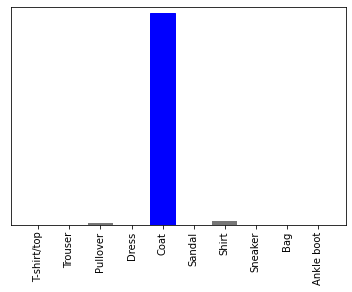

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [32]:
np.argmax(predictions[0])

4

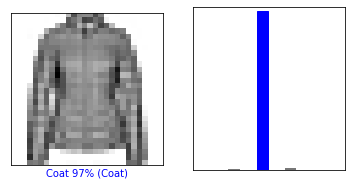

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)